In [1]:
import numpy as np 
import pandas as pd 
import warnings

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

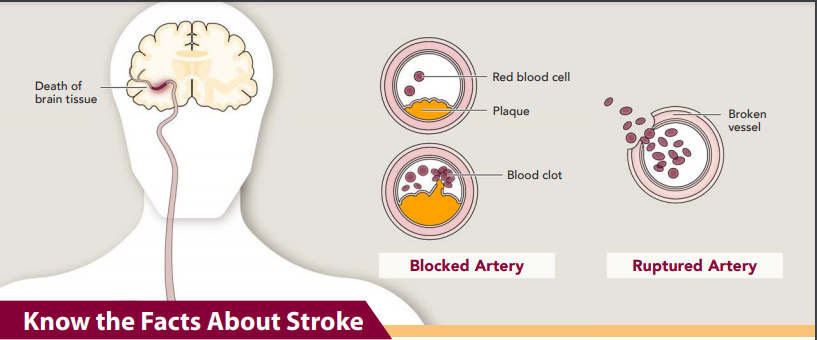

https://www.cdc.gov/stroke/docs/Know_the_Facts_About_Stroke.pdf
 

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#7ca4cd; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [1. Data Loading and Feature Engineering](#1)
* [2. Imports Lab](#2)
* [3. Random Forest](#3)
* [4. AdaBoost](#4)
* [5. XGBoost](#5)
* [6. LightGBM](#6)
* [7. CatBoost](#7)
* [8. Logistic Regression](#8)
* [9. SVC](#9)
* [10. K-Nearest Neighbors](#10)
* [Submission](#100)

<a id="1"></a>
<h2 style='background:#7ca4cd; border:0; color:white'><center>Data Loading and Feature Engineering<center><h2>

In [2]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<a id="3"></a>
<h2 style='background:#7ca4cd; border:0; color:white'><center>Imports Lab<center><h2>

In [5]:
!pip install deep_autoviml

     |████████████████████████████████| 124 kB 1.2 MB/s 
     |████████████████████████████████| 14.5 MB 8.5 MB/s 
     |████████████████████████████████| 4.3 MB 23.1 MB/s 
     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 108 kB 68.2 MB/s 
     |████████████████████████████████| 96 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 52.3 MB/s 
     |████████████████████████████████| 4.0 MB 53.4 MB/s 
     |████████████████████████████████| 462 kB 23.6 MB/s 
     |████████████████████████████████| 4.0 MB 44.2 MB/s 
     |████████████████████████████████| 6.0 MB 49.6 MB/s 
     |████████████████████████████████| 4.9 MB 46.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
 

In [6]:
import sklearn.model_selection
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.49
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [7]:
df.corr().abs()['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64

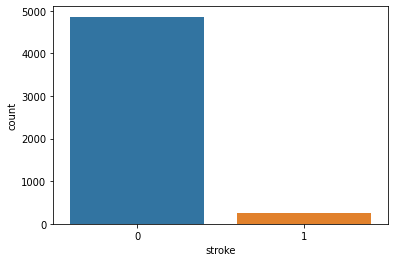

In [8]:
# TARGET BALANCE
sns.countplot(x='stroke',data=df);

## Split dataset Train 80% & Test 20%

In [9]:
train, test = sklearn.model_selection.train_test_split(df,stratify=df["stroke"], train_size=.66, random_state=1)
print(train.shape, test.shape)

(3372, 11) (1738, 11)


In [10]:
target = 'stroke'

In [11]:
keras_model_type =  "fast1" ## always try "fast" first, then "fast2", "auto", etc.
### always set early_stopping to True first and then change it to False
#### You always need 15 max_trials to get something decent #####
#### always set tuner to "storm" and then "optuna". 
### NLP char limit kicks off NLP processing. Feature Cross later.
project_name = "Stroke prediction "
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':False,
                 'max_trials': 10, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 50
    max_trials : 10
    tuner : storm
Max Trials is 10 for faster processing. Please increase max_trials if you want more accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying

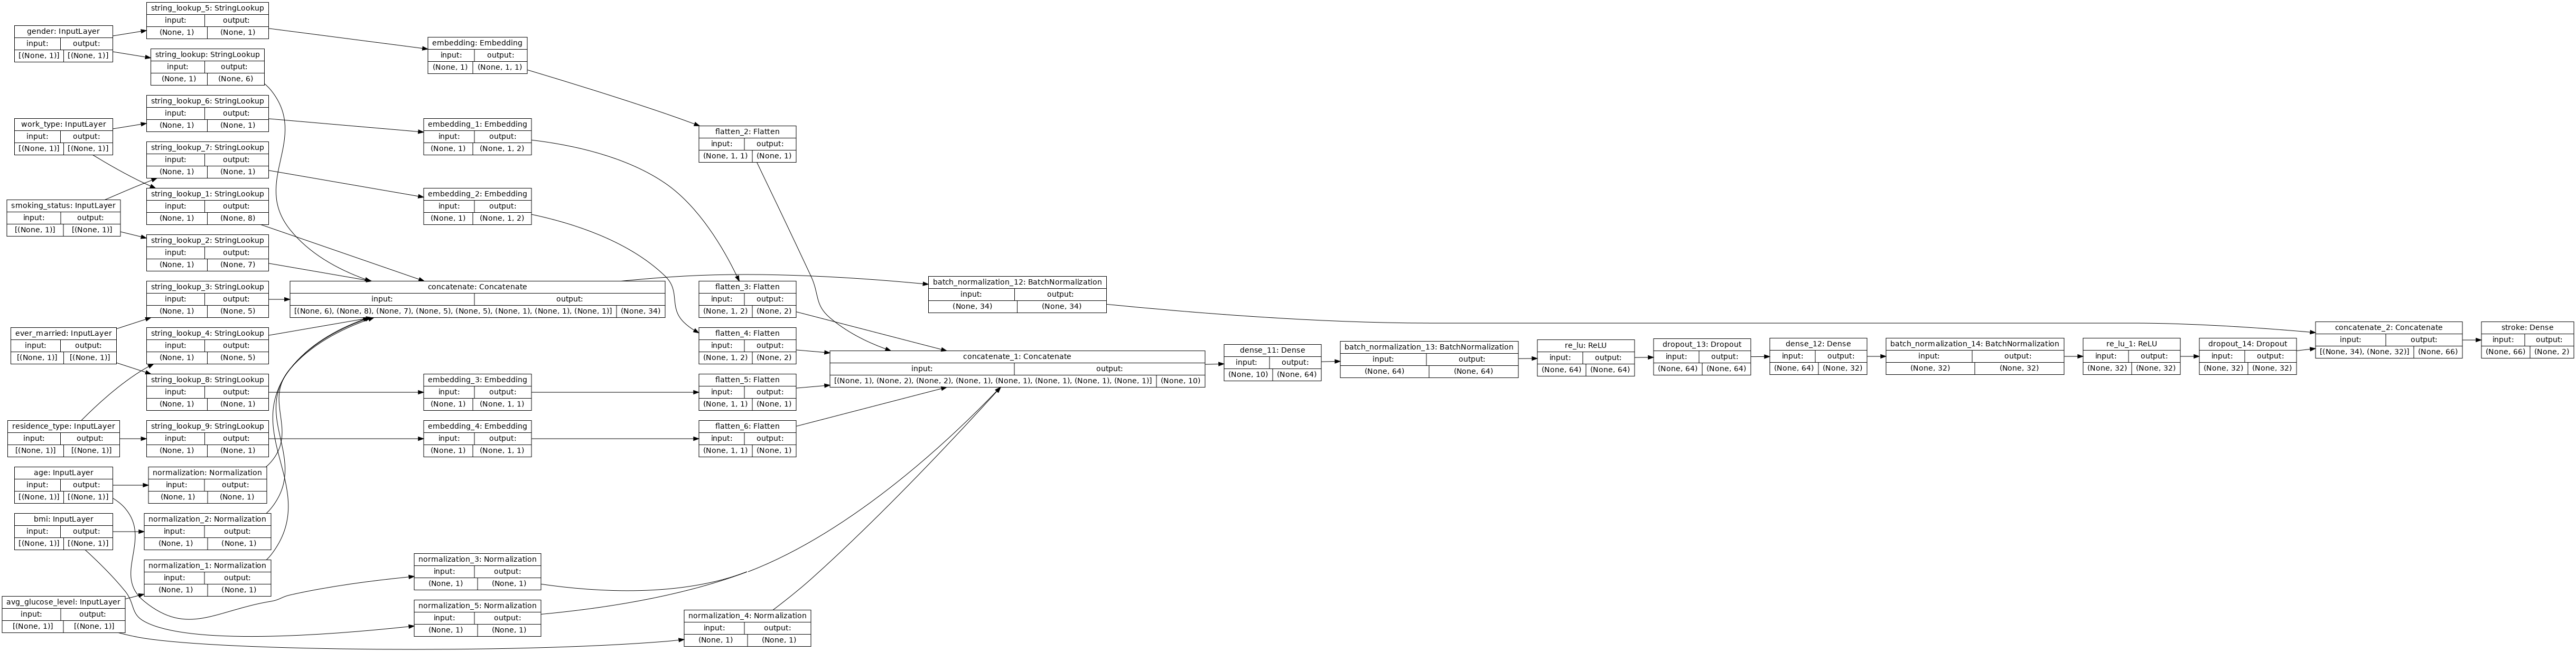

Model plot saved in file: deep_autoviml_Stroke prediction _fast1_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast1 model option...
    class_weights: {0: 1.0, 1: 1.028048780487805}
    original datasize = 3372, initial batchsize = 32
    recommended steps per epoch = 52
    recommended OneCycle steps = 10600
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 100, steps per epoch = 52

Splitting train into 80+20 percent: train and validation data
    Splitting valida

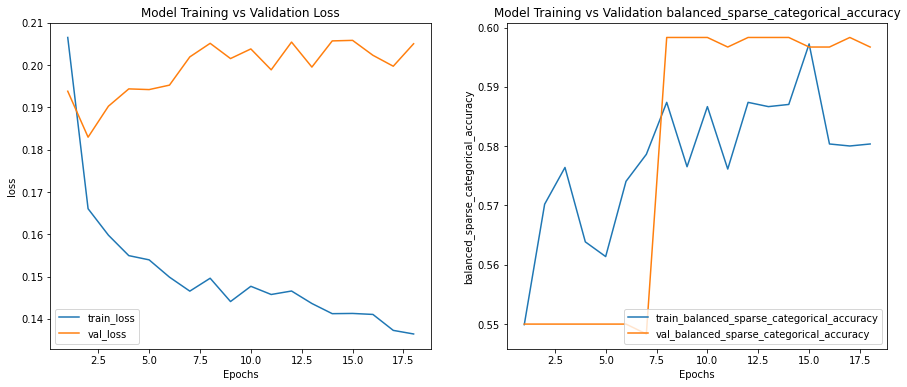


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: stroke
#################################################################


    Accuracy          = 94.3%
    Balanced Accuracy = 52.3%
    Precision         = 50.0%
    Average Precision = 72.3%
    Recall            = 5.0%
    F1 Score          = 9.1%
    ROC AUC           = 78.3%
#####################################################

Training on full train dataset for 8 epochs. This will take time...
    completed. Time taken (in mins) = 0


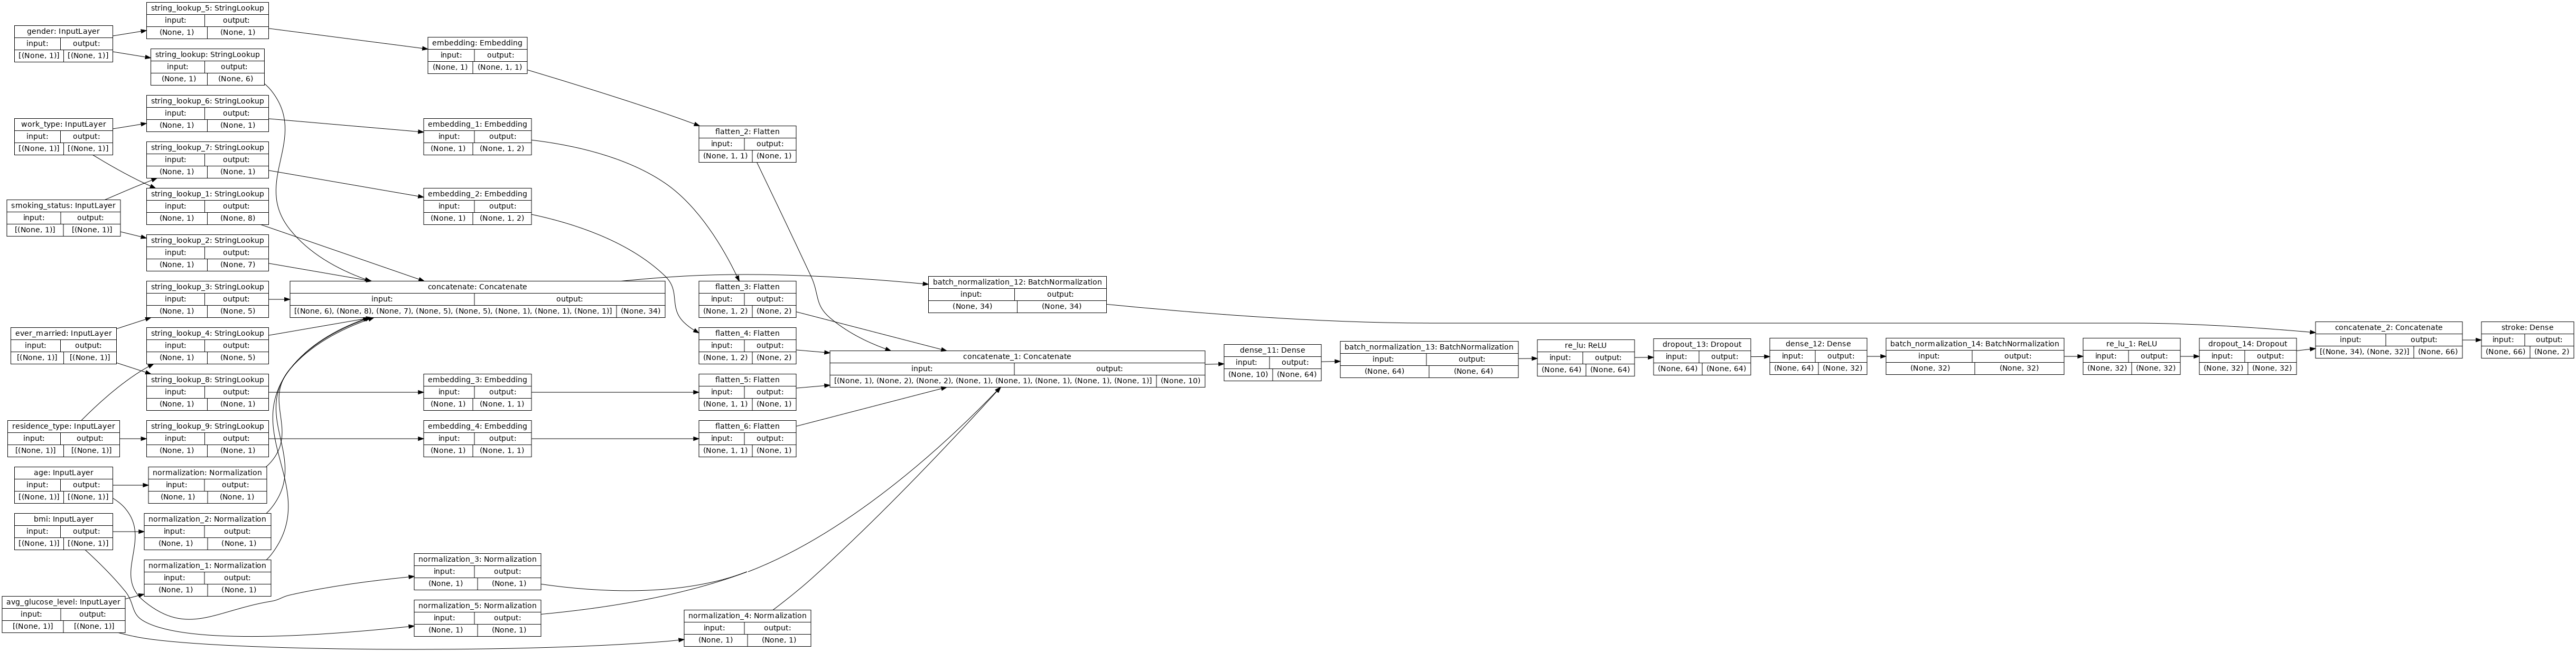

Model plot saved in file: deep_autoviml_Stroke prediction _fast1_model_after.png


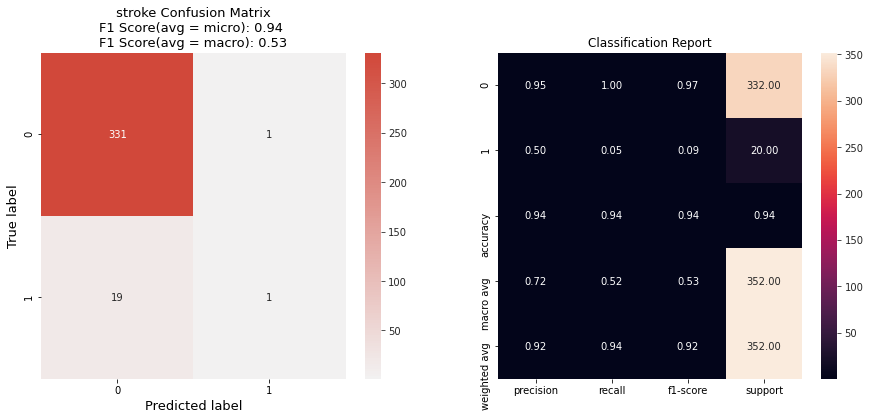

In [12]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type=keras_model_type,
        project_name=project_name, keras_options=keras_options,  
        model_options=model_options, save_model_flag=True, use_my_model='',
        model_use_case='', verbose=1)

# Now let us predict using the best model on test data

In [13]:
predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f6d54074490> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 1738
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    test data loaded successfully.
test data size =  1738 , batch_size =  32
Boolean column successfully processed
    number of steps needed to predict: 55
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [14]:
y_test = test[target].values
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
y_preds = predictions[-1]
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
labels = np.unique(y_test)
target_names = np.unique(y_test)
labels, target_names

(array([0, 1]), array([0, 1]))

In [17]:
from deep_autoviml.utilities.utilities import plot_classification_results

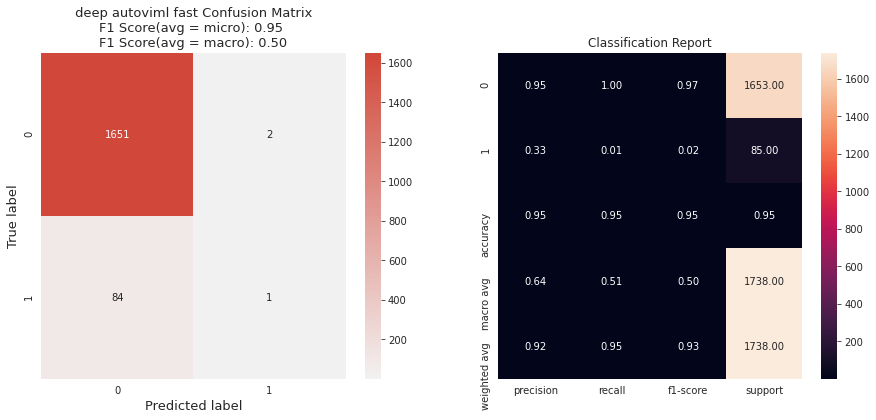

In [18]:
plot_classification_results(y_test, y_preds, 
                            labels, target_names, title_string='deep autoviml fast')